 The primary goal of this dataset is to analysis  employee attrition

 The watson_healthcare_modified.csv dataset contains information about employees, focusing on various demographic, job-related, and satisfaction factors. It is designed to analyze employee attrition, work engagement, and other HR metrics. The dataset comprises the following features:

**Age**: The employee’s age in years, indicating generational differences and experience levels.

**Attrition**: Indicates whether the employee has left the company ("Yes") or stayed ("No").

**BusinessTravel**: Describes the frequency of employee travel for work, such as "Travel_Frequently" or "Non-Travel."

**DailyRate**: The daily salary paid to the employee based on their daily working hours.

**Department**: The division within the company where the employee works, such as Sales, HR, IT, etc.

**DistanceFromHome**: The physical distance between the employee’s home and their workplace, typically in miles.

**Education**: The highest educational qualification attained by the employee, such as "Bachelor's" or "Master's."

**EducationField**: The field in which the employee studied, such as "Life Sciences" or "Technology."

**EmployeeCount**: Represents the total number of employees in the organization, typically constant as "1."

**EnvironmentSatisfaction**: Measures how satisfied the employee is with their work environment (e.g., "Low" to "High").

**Gender**: The gender of the employee, commonly recorded as "Male," "Female," or "Other."

**HourlyRate**: The employee’s wage paid per hour of work, typically for hourly-paid or contract roles.

**JobInvolvement**: A measure of how engaged the employee is with their job, indicating commitment and enthusiasm.

**JobLevel**: The organizational rank or level of the employee, where higher levels indicate more senior roles.

**JobRole**: The specific role the employee holds within the company, such as "Software Engineer" or "Manager."

**JobSatisfaction**: Indicates how satisfied the employee is with their current job, based on task fulfillment and environment.

**MaritalStatus** : The marital status of the employee, such as "Single," "Married," or "Divorced."

**MonthlyIncome**: The total income the employee earns per month, reflecting their compensation package.

**MonthlyRate**: The employee’s monthly sales or work performance rate, typically for sales or commission-based roles.

**NumCompaniesWorked**: The number of companies the employee has worked for in their career, indicating job mobility.

**Over18**: Indicates whether the employee is over 18 years old, typically marked as "Y" (Yes).

**OverTime**: A binary variable indicating whether the employee works overtime ("Yes") or not ("No").

**PercentSalaryHike**: The percentage increase in the employee’s salary in the previous year, reflecting their performance.

**PerformanceRating**: A rating of the employee’s work performance, often on a scale from 1 to 5.

**RelationshipSatisfaction**: Measures how satisfied the employee is with their work relationships, including colleagues and managers.

**StandardHour**s: The standard working hours per week expected of the employee, typically 40 hours.

**Shift**: The shift type worked by the employee, such as "Day," "Night," or "Rotational."

**TotalWorkingYears**: The total number of years the employee has spent working across all jobs and organizations.

**TrainingTimesLastYear**: The number of professional training or development sessions attended by the employee in the past year.

**WorkLifeBalance**: A measure of how well the employee balances work commitments with personal life.









In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv("/content/watson_healthcare_modified.csv")

In [4]:
df.shape

(1676, 35)

In [5]:
df.head(15)

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
5,1633361,32,No,Travel_Frequently,1005,Maternity,2,2,Life Sciences,1,...,3,80,0,8,2,2,7,7,3,6
6,1329390,59,No,Travel_Rarely,1324,Maternity,3,3,Medical,1,...,1,80,3,12,3,2,1,0,0,0
7,1699288,30,No,Travel_Rarely,1358,Maternity,24,1,Life Sciences,1,...,2,80,1,1,2,3,1,0,0,0
8,1469740,38,No,Travel_Frequently,216,Maternity,23,3,Life Sciences,1,...,2,80,0,10,2,3,9,7,1,8
9,1101291,36,No,Travel_Rarely,1299,Maternity,27,3,Medical,1,...,2,80,2,17,3,2,7,7,7,7


In [6]:
df = df.drop(columns='EmployeeID')

In [7]:
df=df.dropna()

In [8]:
df.shape

(1676, 34)

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [10]:
df = df.drop(columns=['Over18', 'StandardHours'])

In [11]:
df =df.dropna()
df.shape

(1676, 32)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1676 non-null   int64 
 1   Attrition                 1676 non-null   object
 2   BusinessTravel            1676 non-null   object
 3   DailyRate                 1676 non-null   int64 
 4   Department                1676 non-null   object
 5   DistanceFromHome          1676 non-null   int64 
 6   Education                 1676 non-null   int64 
 7   EducationField            1676 non-null   object
 8   EmployeeCount             1676 non-null   int64 
 9   EnvironmentSatisfaction   1676 non-null   int64 
 10  Gender                    1676 non-null   object
 11  HourlyRate                1676 non-null   int64 
 12  JobInvolvement            1676 non-null   int64 
 13  JobLevel                  1676 non-null   int64 
 14  JobRole                 

In [13]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,2.738663,...,3.150358,2.718377,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,1.104005,...,0.357529,1.078162,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000



Count: The number of non-missing values for each column (all columns have 1676 entries).
Mean: The average value for each numerical column.
Standard Deviation (std): Indicates how spread out the values are from the mean.
Minimum (min): The smallest value observed in each column.
25th Percentile (25%): Also known as the first quartile, indicating that 25% of the data points are below this value.
50th Percentile (50%): The median, which divides the data into two equal halves.
75th Percentile (75%): The third quartile, meaning 75% of the data points are below this value.
Maximum (max): The highest value in each column.
Key Observations:
Age: Employees range from 18 to 60 years, with an average age of around 37.
DailyRate: The rate varies widely from 102 to 1499, with a mean of about 801.
TotalWorkingYears: Employees have up to 40 years of experience, with an average of 11 years.
YearsAtCompany: Most employees have been at the company for around 7 years, with a maximum of 40 years.
MonthlyIncome: Varies significantly, ranging from 1009 to 20,469, reflecting different levels of compensation.
NumCompaniesWorked: Some employees have only worked at this company, while others have worked at up to 9 different companies.

In [14]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [15]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EnvironmentSatisfaction,0


In [16]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1671,False
1672,False
1673,False
1674,False


In [17]:
# Check for any duplicate rows in the entire DataFrame
duplicates = df.duplicated()

# Count the number of duplicates
print("Number of duplicate rows:", duplicates.sum())

# If you want to see the duplicate rows
duplicate_rows = df[duplicates]
print(duplicate_rows)


Number of duplicate rows: 56
      Age Attrition     BusinessTravel  DailyRate  Department  \
1475   36        No         Non-Travel       1229  Cardiology   
1477   24        No      Travel_Rarely       1206   Maternity   
1481   40        No      Travel_Rarely        444  Cardiology   
1491   41        No      Travel_Rarely        930  Cardiology   
1494   42        No      Travel_Rarely        933   Maternity   
1498   31        No      Travel_Rarely       1112  Cardiology   
1499   29        No      Travel_Rarely       1389   Maternity   
1500   41        No      Travel_Rarely        645  Cardiology   
1501   38        No      Travel_Rarely        345  Cardiology   
1503   35        No  Travel_Frequently       1182  Cardiology   
1505   40        No      Travel_Rarely        369   Maternity   
1506   46        No      Travel_Rarely       1319  Cardiology   
1515   25        No      Travel_Rarely        810  Cardiology   
1525   32        No      Travel_Rarely        801  Cardiology

In [18]:

df_cleaned = df.drop_duplicates()

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)
print("Data after removing duplicates:")
print(df_cleaned)

# Check the shape of the dataset before and after
print("\nOriginal shape:", df.shape)
print("Shape after removing duplicates:", df_cleaned.shape)


Data after removing duplicates:
      Age Attrition     BusinessTravel  DailyRate  Department  \
0      41        No      Travel_Rarely       1102  Cardiology   
1      49        No  Travel_Frequently        279   Maternity   
2      37       Yes      Travel_Rarely       1373   Maternity   
3      33        No  Travel_Frequently       1392   Maternity   
4      27        No      Travel_Rarely        591   Maternity   
...   ...       ...                ...        ...         ...   
1615   26       Yes      Travel_Rarely        471   Neurology   
1616   46        No      Travel_Rarely       1125  Cardiology   
1617   20        No      Travel_Rarely        959   Maternity   
1618   39        No      Travel_Rarely        466   Neurology   
1619   27        No      Travel_Rarely        511  Cardiology   

      DistanceFromHome  Education    EducationField  EmployeeCount  \
0                    1          2     Life Sciences              1   
1                    8          1     Life Scie

In [19]:
df_cleaned.shape

(1620, 32)

In [20]:
df_cleaned.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Maternity,2,2,Life Sciences,1,4,...,3,3,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Maternity,3,3,Medical,1,3,...,4,1,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Maternity,24,1,Life Sciences,1,4,...,4,2,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Maternity,23,3,Life Sciences,1,4,...,4,2,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Maternity,27,3,Medical,1,3,...,3,2,2,17,3,2,7,7,7,7


In [21]:
df_cleaned.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.0,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,...,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000
mean,36.954321,802.144444,9.191358,2.910494,1.0,2.721605,65.540123,2.722840,2.072222,2.738889,...,3.153086,2.719136,0.792593,11.356173,2.803086,2.761728,7.043827,4.259259,2.200617,4.141975
std,9.173660,402.589316,8.132347,1.024717,0.0,1.095063,20.210144,0.714517,1.123215,1.102681,...,0.360182,1.081373,0.851664,7.867474,1.288564,0.704712,6.128533,3.626741,3.227985,3.567521
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,798.500000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1162.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
# X will contain all the features except 'Attrition' (the target variable)
X = df_cleaned.drop(columns='Attrition')

# y will contain only the target variable 'Attrition'
y = df_cleaned['Attrition']

# Check the shape of X and y
print(X.shape)
print(y.shape)


(1620, 31)
(1620,)


In [23]:
cat_columns = ['BusinessTravel', 'Department','JobInvolvement','PerformanceRating', 'JobLevel', 'JobSatisfaction', 'EducationField','WorkLifeBalance','TrainingTimesLastYear',
               'Gender', 'RelationshipSatisfaction','Education', 'EnvironmentSatisfaction','JobRole', 'MaritalStatus',  'OverTime', 'Shift']


num_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',

                    'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                    'PercentSalaryHike', 'TotalWorkingYears',
                     'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']


cat_columns_cleaned = cat_columns  # Define your categorical columns
num_columns_cleaned = num_columns

rewrite the numerical variables
drop standardhours and over18

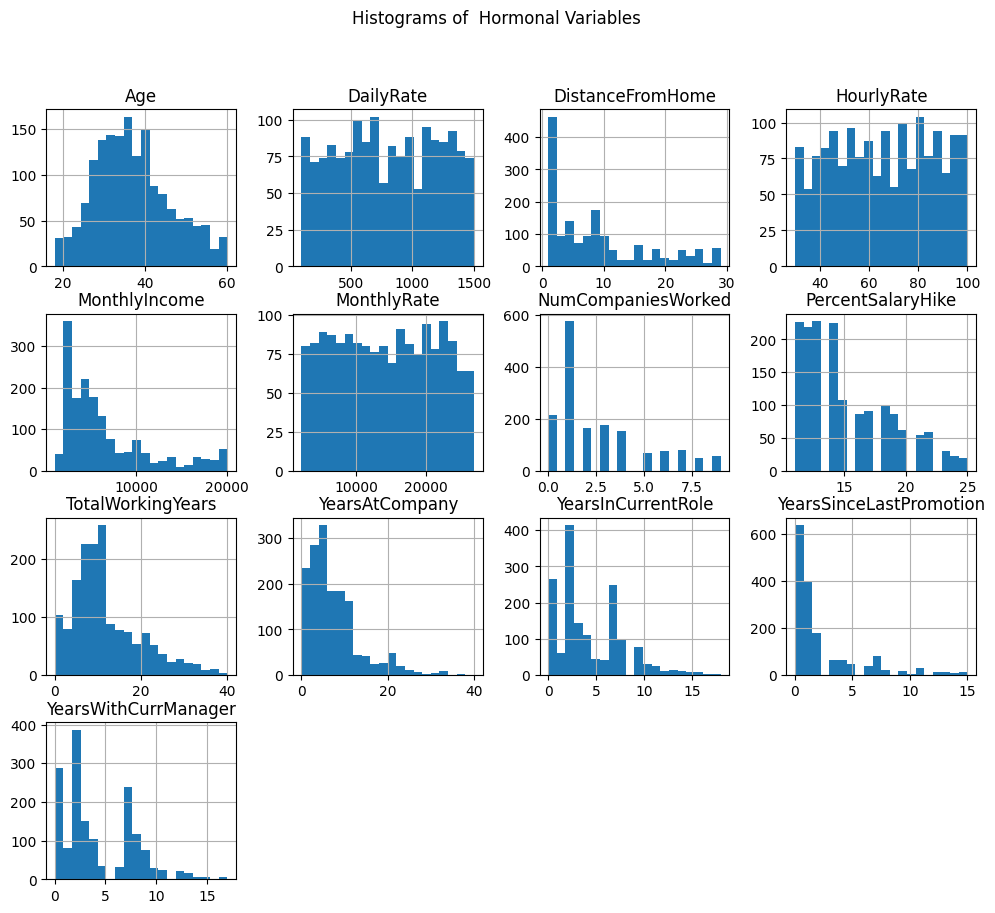

In [24]:

X[num_columns].hist(bins=20, figsize=(12, 10))
plt.suptitle("Histograms of  Hormonal Variables")
plt.show()

PCA

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming 'scaled_data' is preprocessed (scaled or transformed) numerical data
pca = PCA()  # Initialize PCA

# Fit the PCA on the data

pca.fit(df_cleaned[num_columns])

# Get the explained variance ratio for each principal component
explained_variance1 = pca.explained_variance_ratio_


In [26]:
explained_variance1

array([6.88441571e-01, 3.09349326e-01, 2.20041348e-03, 5.54885417e-06,
       1.02175975e-06, 8.92857267e-07, 6.28419400e-07, 1.81022806e-07,
       1.60749432e-07, 8.24462881e-08, 7.09369265e-08, 5.53279611e-08,
       4.72905666e-08])

The first component explains 68.84% of the variance.
The second component adds 30.93%.

The explained variance ratio tells as how much of the total variance each principal component (PC) explains.

In [27]:
cumulative_variance1 = np.cumsum(explained_variance1)
print(cumulative_variance1)

[0.68844157 0.9977909  0.99999131 0.99999686 0.99999788 0.99999877
 0.9999994  0.99999958 0.99999974 0.99999983 0.9999999  0.99999995
 1.        ]


The cumulative explained variance shows how much total variance is explained as more principal components (PCs) are added:



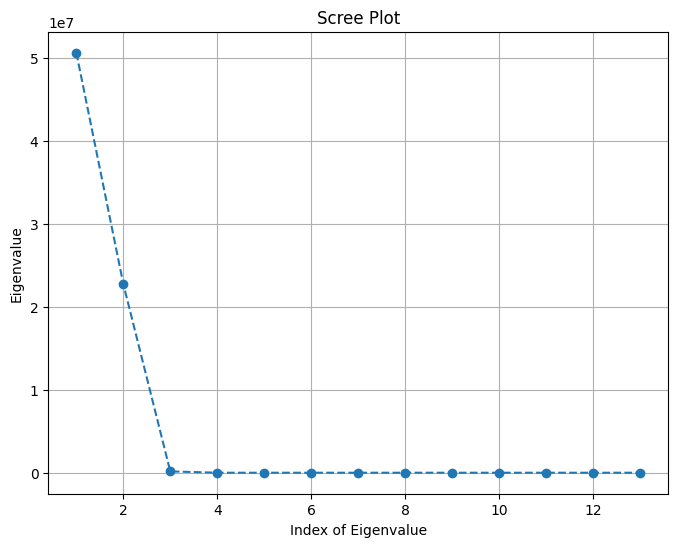

In [28]:
import numpy as np

# Assuming 'scaled_data' is  preprocessed (scaled) numerical data
# Calculate the covariance matrix
cov_matrix = np.cov(X[num_columns].T)  # Transpose to get variables in columns

# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]  # Sorting in decreasing order

import matplotlib.pyplot as plt

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Index of Eigenvalue")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

The scree plot is a graphical representation of the eigenvalues sorted in descending order.

The eigenvalues indicate the amount of variance explained by each principal component (PC).

In the scree plot, the eigenvalues will start high and decrease as more PCs are added.

The elbow point in the plot suggests the optimal number of PCs to retain. Before this point, each successive PC contributes significantly to explaining the variance, but beyond it, additional PCs contribute very little.

*Performing PCA after Standardization

In [29]:
# pca standardization
pt = StandardScaler()

# Apply the transformation to the numerical columns
transformed_df1_cleaned = pt.fit_transform(X[num_columns])

# Convert back to DataFrame if needed
transformed_df1_cleaned = pd.DataFrame(transformed_df1_cleaned, columns=num_columns)

# Apply PCA
pca2 = PCA(n_components=None)  # You can specify the number of components, e.g., n_components=2
X_pca = pca2.fit_transform(transformed_df1_cleaned)

# Get the explained variance ratio
explained_variance2 = pca2.explained_variance_ratio_

# Display the explained variance for each component
print(explained_variance2)



[0.31047591 0.12567813 0.08185614 0.0806911  0.07744742 0.0736329
 0.07060966 0.05693761 0.04057719 0.03542628 0.02102511 0.01488761
 0.01075495]


In [30]:
cumulative_variance2 = np.cumsum(explained_variance2)
print(cumulative_variance2)

[0.31047591 0.43615403 0.51801017 0.59870127 0.67614869 0.74978159
 0.82039125 0.87732885 0.91790604 0.95333233 0.97435744 0.98924505
 1.        ]


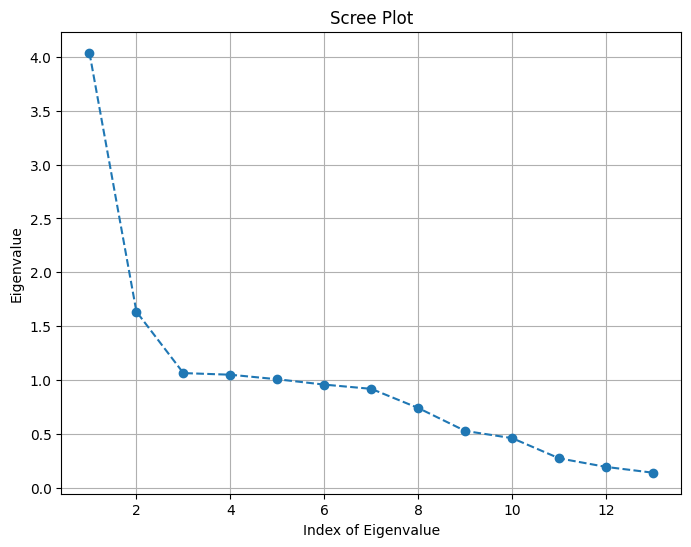

In [31]:
cov_matrix = np.cov(transformed_df1_cleaned.T)  # Transpose to get variables in columns

# Perform eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]  # Sorting in decreasing order

import matplotlib.pyplot as plt

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(sorted_eigenvalues) + 1), sorted_eigenvalues, marker='o', linestyle='--')
plt.title("Scree Plot")
plt.xlabel("Index of Eigenvalue")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.show()

The scree plot displays the eigenvalues in descending order.
A sharp drop in eigenvalues indicates that the first few components explain the majority of the variance in the dataset.
The components with smaller eigenvalues contribute little to the total variance and can be discarded for dimensionality reduction.
Based on the plot, you can choose to keep the first few components for further analysis, focusing on those that capture the most variance.

In [32]:
sorted_eigenvalues

array([4.03867978, 1.63482481, 1.06478706, 1.04963222, 1.00743833,
       0.95781889, 0.91849259, 0.74064605, 0.52782928, 0.46082615,
       0.27349527, 0.19365849, 0.13990072])

Factor Analysis

In [33]:
transformed_df1_cleaned.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.441147,0.745047,-1.007567,1.408632,-0.116711,0.728064,2.147504,-1.157986,-0.426720,-0.170375,-0.071508,-0.681941,0.240584
1,1.313478,-1.299851,-0.146541,-0.224715,-0.297480,1.491439,-0.673380,2.130728,-0.172430,0.482511,0.755937,-0.372055,0.801371
2,0.004981,1.418398,-0.884564,1.309642,-0.934258,-1.674429,1.341537,-0.061748,-0.553865,-1.149705,-1.174767,-0.681941,-1.161382
3,-0.431185,1.465607,-0.761560,-0.472192,-0.762705,1.245606,-0.673380,-1.157986,-0.426720,0.156068,0.755937,0.247718,-1.161382
4,-1.085433,-0.524628,-0.884564,-1.264118,-0.645613,0.327672,2.550487,-0.883927,-0.681010,-0.823261,-0.623137,-0.062169,-0.600595


In [34]:
# Check if 'EmployeeCount' exists in the DataFrame columns
if 'EmployeeCount' in transformed_df1_cleaned.columns:
    transformed_df1_cleaned = transformed_df1_cleaned.drop(columns=['EmployeeCount'])
    print("'EmployeeCount' column dropped.")
else:
    print("'EmployeeCount' column not found; no changes made.")

# Display the first few rows of the DataFrame to confirm
print(transformed_df1_cleaned.head())




'EmployeeCount' column not found; no changes made.
        Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
0  0.441147   0.745047         -1.007567    1.408632      -0.116711   
1  1.313478  -1.299851         -0.146541   -0.224715      -0.297480   
2  0.004981   1.418398         -0.884564    1.309642      -0.934258   
3 -0.431185   1.465607         -0.761560   -0.472192      -0.762705   
4 -1.085433  -0.524628         -0.884564   -1.264118      -0.645613   

   MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
0     0.728064            2.147504          -1.157986          -0.426720   
1     1.491439           -0.673380           2.130728          -0.172430   
2    -1.674429            1.341537          -0.061748          -0.553865   
3     1.245606           -0.673380          -1.157986          -0.426720   
4     0.327672            2.550487          -0.883927          -0.681010   

   YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \

In [35]:
transformed_df1_cleaned.shape

(1620, 13)

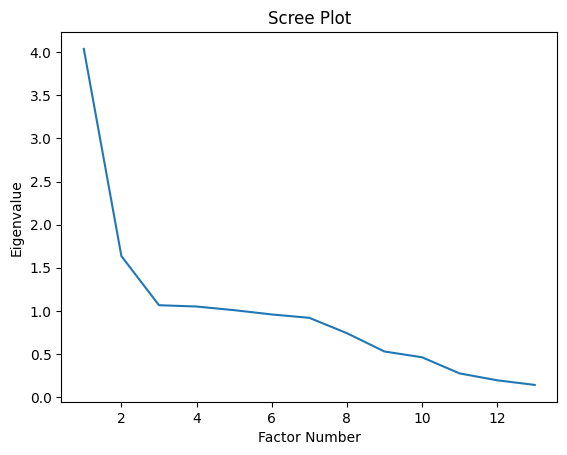

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(transformed_df1_cleaned)
plt.plot(range(1, len(pca.explained_variance_)+1), pca.explained_variance_)
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [37]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=4)
factors = fa.fit_transform(transformed_df1_cleaned)

In [38]:
import pandas as pd

# Check the number of columns in fa.components_.T and num_columns
print("Shape of factor analysis components:", fa.components_.T.shape)
print("Length of num_columns:", len(num_columns))

# Adjust the index if needed
if len(num_columns) != fa.components_.T.shape[0]:
    num_columns = num_columns[:fa.components_.T.shape[0]]  # Truncate or adjust as needed

# Create the DataFrame
factor_loadings = pd.DataFrame(fa.components_.T, index=num_columns, columns=[f'Factor {i+1}' for i in range(4)])
print(factor_loadings)


Shape of factor analysis components: (13, 4)
Length of num_columns: 13
                         Factor 1  Factor 2  Factor 3  Factor 4
Age                      0.514758  0.517402 -0.129010  0.225688
DailyRate               -0.009732  0.033588 -0.079941 -0.038579
DistanceFromHome        -0.010281 -0.024880 -0.034940  0.043595
HourlyRate              -0.011012  0.022838 -0.011171  0.051632
MonthlyIncome            0.702484  0.450911  0.098081 -0.315656
MonthlyRate             -0.007450  0.070958 -0.012953 -0.034004
NumCompaniesWorked       0.036533  0.421941 -0.204711  0.124255
PercentSalaryHike       -0.020383 -0.002281 -0.067735 -0.002403
TotalWorkingYears        0.830686  0.475057 -0.033796  0.061006
YearsAtCompany           0.917835 -0.285848  0.126970  0.040528
YearsInCurrentRole       0.762402 -0.371106 -0.333801 -0.099738
YearsSinceLastPromotion  0.606232 -0.207223 -0.023507 -0.012886
YearsWithCurrManager     0.745825 -0.342160 -0.090978  0.024409


In [39]:
communalities = (factor_loadings**2).sum(axis=1)

# Create DataFrame for Results
results = pd.DataFrame({
    'Communalities': communalities,
}, index=transformed_df1_cleaned.columns)

pd.set_option('display.float_format', '{:.10f}'.format)

# Output Results
print(results.sort_values(by="Communalities", ascending=False))

                         Communalities
YearsAtCompany            0.9418938510
TotalWorkingYears         0.9205821754
YearsInCurrentRole        0.8403469069
MonthlyIncome             0.8060621557
YearsWithCurrManager      0.6822007187
Age                       0.6002592493
YearsSinceLastPromotion   0.4111767608
NumCompaniesWorked        0.2367149392
DailyRate                 0.0091016969
MonthlyRate               0.0064146718
PercentSalaryHike         0.0050144938
DistanceFromHome          0.0038460289
HourlyRate                0.0034334630


The communalities indicate how much of the variance in each variable is explained by the factors extracted during the factor analysis.

 The missing value suggests that this variable may not have been adequately represented or might be highly correlated with other variables in the analysis.

In [40]:
factor_scores = fa.transform(transformed_df1_cleaned)  # If using `factor_analyzer`
scores_df1_cleaned = pd.DataFrame(factor_scores, columns=[f'Factor {i+1}' for i in range(factor_scores.shape[1])])
print(scores_df1_cleaned)

          Factor 1      Factor 2      Factor 3      Factor 4
0    -0.2209839637  0.0062444905 -0.3822035719  0.2199739988
1     0.3429083520 -0.6104745912 -0.5117906361  0.4943027642
2    -1.0863856884  0.5997867520 -0.1677442584  0.6660502682
3    -0.1261458353 -0.7597173877 -0.3781785906 -0.0294155919
4    -0.8423510710  0.0687159780 -0.2513662514  0.0036653959
...            ...           ...           ...           ...
1615 -1.2929884843 -0.3263614547  0.5872215577 -0.1783833653
1616 -0.2154190989  1.2480442190 -0.1276303102 -0.0229166877
1617 -1.3055257932 -0.3952961925  0.7574139699 -0.5143345356
1618  1.8378203302 -0.4968332948  1.7891341664  0.0999678195
1619  0.0783595203 -0.8003176291 -0.2770865034 -0.7181711848

[1620 rows x 4 columns]


Observation 0: The scores indicate a negative association with Factor 1 and Factor 3, and a relatively neutral association with Factor 2 and Factor 4.

Observation 1: Shows a positive association with Factor 1 but negative associations with Factor 2 and Factor 3. This observation could be interpreted as aligning more with Factor 1 but less with Factors 2 and 3.


The factors themselves are linear combinations of the original variables, so these scores represent how much each observation aligns with these combinations.

Factor scores can be applied to further analyze relationships between variables, or to reduce dimensionality when performing predictive modeling or other analysis techniques.



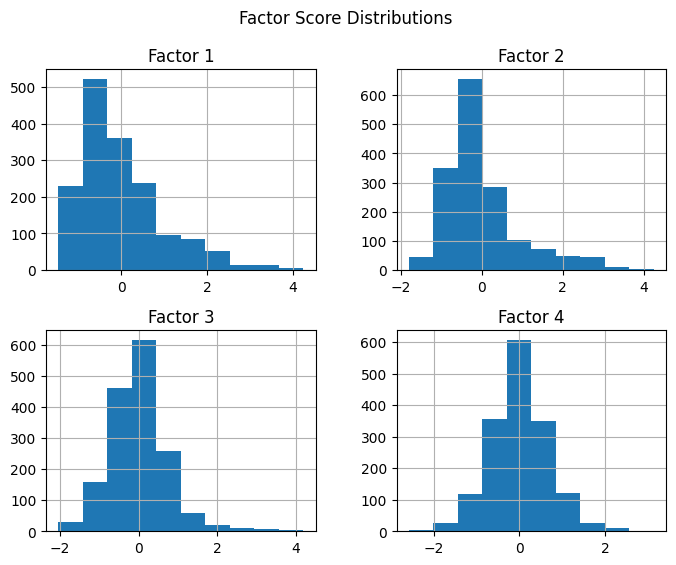

In [41]:
# Plot histograms for each factor score to check their distributions
scores_df1_cleaned.hist(bins=10, figsize=(8, 6))
plt.suptitle("Factor Score Distributions")
plt.show()

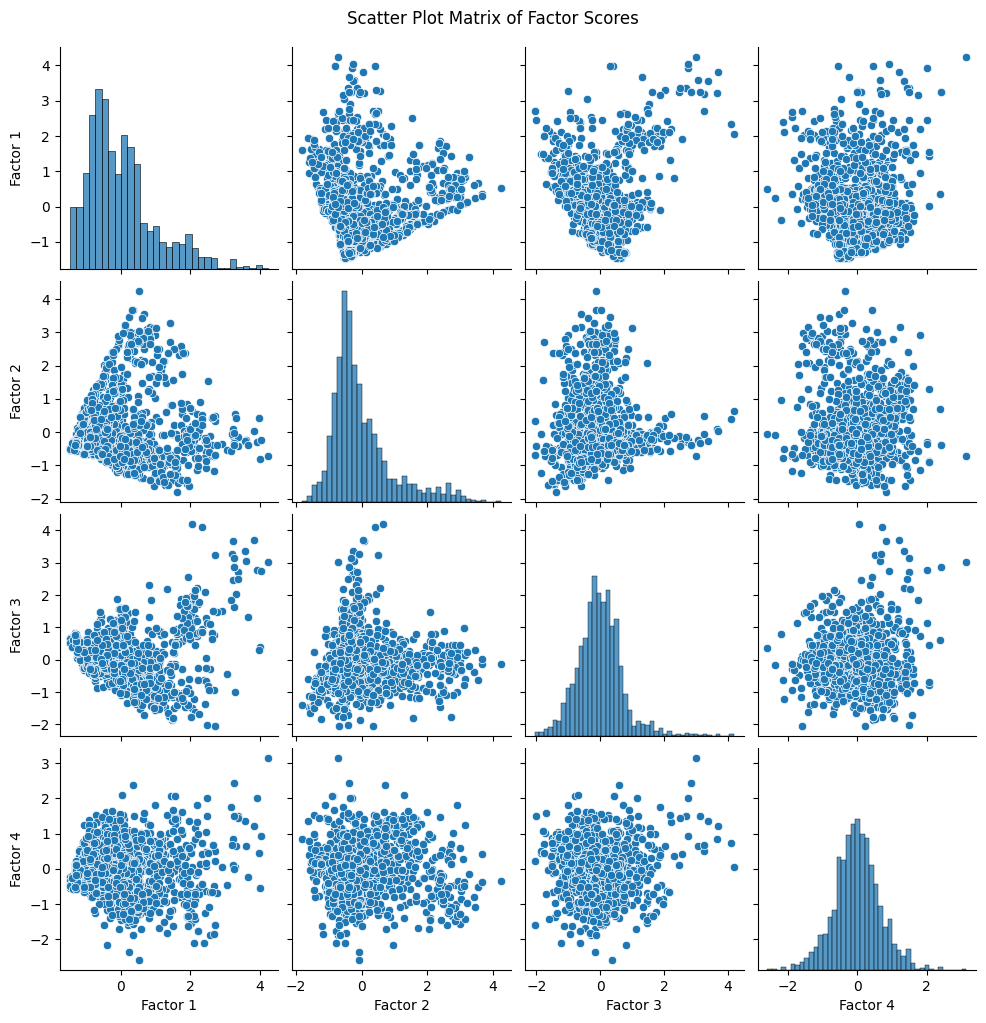

In [42]:
# Scatter plot matrix of factor scores
sns.pairplot(scores_df1_cleaned)
plt.suptitle("Scatter Plot Matrix of Factor Scores", y=1.02)
plt.show()

The scatter plot matrix provides a visual summary of the relationships between all pairs of factor scores. Diagonal plots represent the distribution of each factor individually, showing their spread and central tendency. Off-diagonal plots highlight potential correlations between factors. If there are any linear patterns or clusters, they indicate strong relationships between factors. If the scatter plots show scattered points without any clear pattern, it suggests weak or no correlation between the factors.

In [43]:
pip install factor-analyzer


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=5fc3a488a702dc91fb4e0688d0cb671ffe457cbf7875410ebe20bc3c3d82e25f
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


**Varimax Factor Rotation**

In [44]:
# Step 1: Drop columns with zero variance
zero_variance_cols = transformed_df1_cleaned.columns[transformed_df1_cleaned.nunique() == 1]
print(f"Columns with zero variance: {zero_variance_cols.tolist()}")

# Drop the zero variance column(s)
transformed_df1_cleaned = transformed_df1_cleaned.drop(columns=zero_variance_cols)

# Step 2: Re-run the Factor Analysis
from factor_analyzer import FactorAnalyzer

# Conduct Initial Factor Analysis
fa = FactorAnalyzer(n_factors=4, rotation=None)
fa.fit(transformed_df1_cleaned)

# Get Eigenvalues to determine the number of factors
ev, v = fa.get_eigenvalues()
print("\nEigenvalues:", ev)

# Varimax Rotation
fa_varimax = FactorAnalyzer(n_factors=4, rotation='varimax')
fa_varimax.fit(transformed_df1_cleaned)

# Get factor loadings after Varimax rotation
loadings_varimax = fa_varimax.loadings_

# Convert loadings to DataFrame for better visualization
loadings_varimax_df = pd.DataFrame(loadings_varimax,
                                   columns=[f'Factor {i+1}' for i in range(loadings_varimax.shape[1])],
                                   index=transformed_df1_cleaned.columns)

# Display the Loadings
print("\nVarimax Rotation Loadings:\n", loadings_varimax_df)


Columns with zero variance: []

Eigenvalues: [4.03618677 1.63381566 1.06412978 1.0489843  1.00681646 0.95722764
 0.91792562 0.74018887 0.52750346 0.46054169 0.27332644 0.19353895
 0.13981437]

Varimax Rotation Loadings:
                              Factor 1      Factor 2      Factor 3  \
Age                      0.2801475524  0.6701688244  0.1753947662   
DailyRate               -0.0233251389  0.0282221553  0.1398388369   
DistanceFromHome         0.0050259192 -0.0065299705 -0.0547399783   
HourlyRate              -0.0223015472  0.0503386823 -0.0317148776   
MonthlyIncome            0.4609454725  0.4503249891  0.4599368887   
MonthlyRate             -0.0345483329  0.0436202764  0.0342807923   
NumCompaniesWorked      -0.1046528804  0.4922228335 -0.0347409217   
PercentSalaryHike       -0.0074107244  0.0069872785 -0.0372694303   
TotalWorkingYears        0.5759053061  0.6659942262  0.4317552837   
YearsAtCompany           0.9285861374  0.0146401238  0.1789792625   
YearsInCurrentRole  

## Clustering

In [47]:
from sklearn.cluster import KMeans

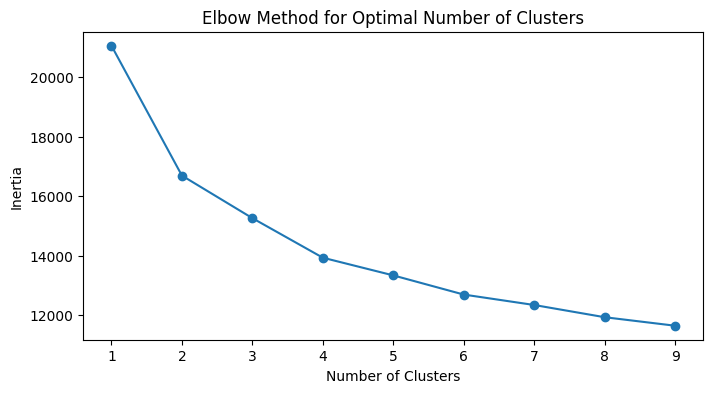

In [48]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(transformed_df1_cleaned)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


In [49]:
transformed_df1_cleaned.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.4411465367,0.7450474586,-1.0075673389,1.4086324746,-0.1167106898,0.7280641578,2.1475037337,-1.1579860634,-0.4267200701,-0.1703751062,-0.0715075384,-0.6819414174,0.2405843320
1,1.3134778024,-1.2998506501,-0.1465414442,-0.2247151470,-0.2974802240,1.4914390124,-0.6733803553,2.1307281911,-0.1724303833,0.4825111671,0.7559368344,-0.3720549949,0.8013708325
2,0.0049809038,1.4183978687,-0.8845636397,1.3096417097,-0.9342581892,-1.6744289595,1.3415368512,-0.0617479785,-0.5538649135,-1.1497045162,-1.1747667021,-0.6819414174,-1.1613819193
3,-0.4311847290,1.4656069380,-0.7615599404,-0.4721920593,-0.7627051782,1.2456064321,-0.6733803553,-1.1579860634,-0.4267200701,0.1560680305,0.7559368344,0.2477178501,-1.1613819193
4,-1.0854331783,-0.5246280378,-0.8845636397,-1.2641181789,-0.6456134405,0.3276720777,2.5504871750,-0.8839265422,-0.6810097569,-0.8232613795,-0.6231371202,-0.0621685724,-0.6005954188


In [50]:
# Initialize the model with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(transformed_df1_cleaned)

# Get cluster labels for each data point
transformed_df1_cleaned['Cluster'] = kmeans.labels_

Visualizing clusters for two major variables - Age and MonthlyIncome

Text(0.5, 1.0, 'Clusters')

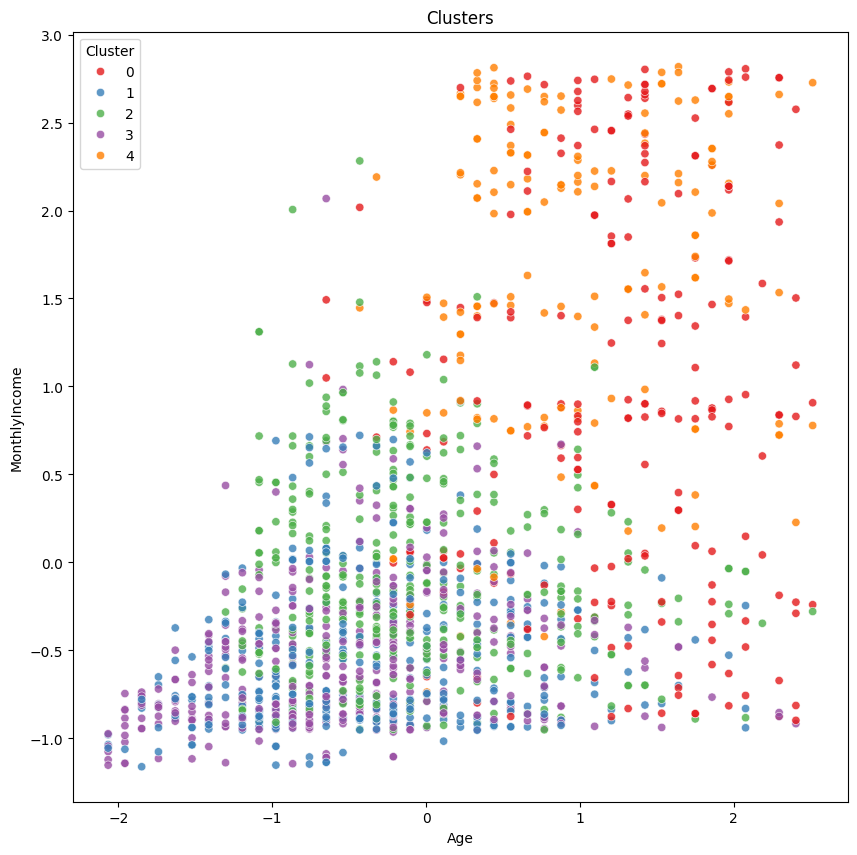

In [51]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=transformed_df1_cleaned, x='Age' , y='MonthlyIncome' , hue='Cluster', palette='Set1', alpha=0.8)
plt.title('Clusters')

Hierarchical clustering for variables

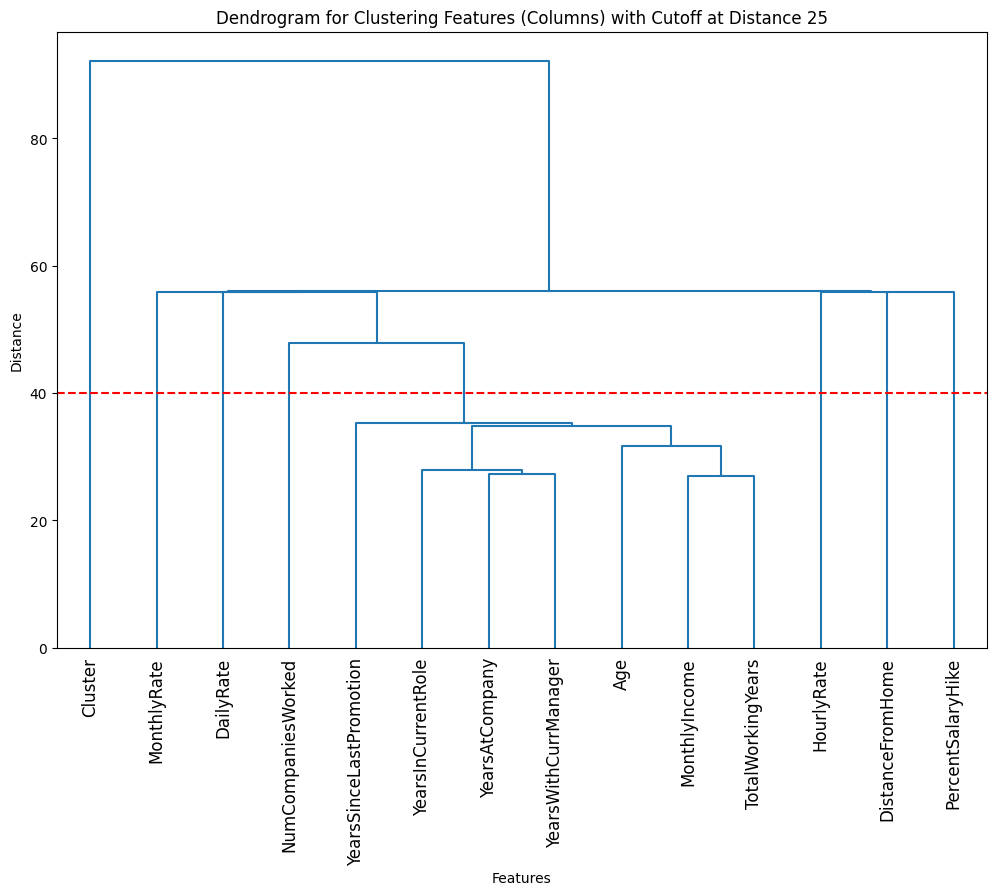

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Transpose the DataFrame so columns are treated as rows for clustering
transformed_df1_cleaned_T = transformed_df1_cleaned.T

# Perform hierarchical/agglomerative clustering using 'single' linkage on the transposed data
linkage_matrix = linkage(transformed_df1_cleaned_T, method='single')

# Plot the dendrogram with a cutoff at distance 25
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    labels=transformed_df1_cleaned_T.index,
    leaf_rotation=90,
    color_threshold=25,  # Set the color threshold to stop clustering at distance 25
)
plt.title('Dendrogram for Clustering Features (Columns) with Cutoff at Distance 25')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.axhline(y=40, color='r', linestyle='--')  # Add a horizontal line to indicate the cutoff
plt.show()


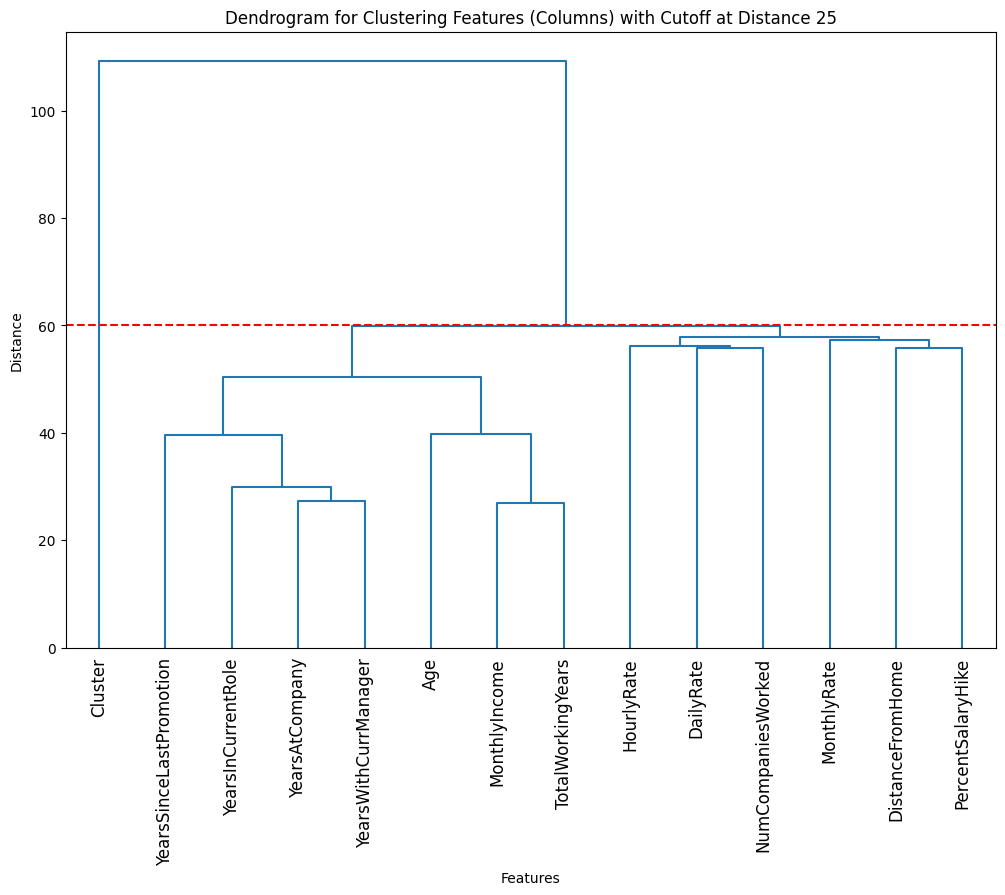

In [56]:
# Transpose the DataFrame so columns are treated as rows for clustering
transformed_df1_cleaned_T = transformed_df1_cleaned.T

# Perform hierarchical/agglomerative clustering using 'single' linkage on the transposed data
linkage_matrix = linkage(transformed_df1_cleaned_T, method='complete')

# Plot the dendrogram with a cutoff at distance 25
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    labels=transformed_df1_cleaned_T.index,
    leaf_rotation=90,
    color_threshold=25,  # Set the color threshold to stop clustering at distance 25
)
plt.title('Dendrogram for Clustering Features (Columns) with Cutoff at Distance 25')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.axhline(y=60, color='r', linestyle='--')  # Add a horizontal line to indicate the cutoff
plt.show()

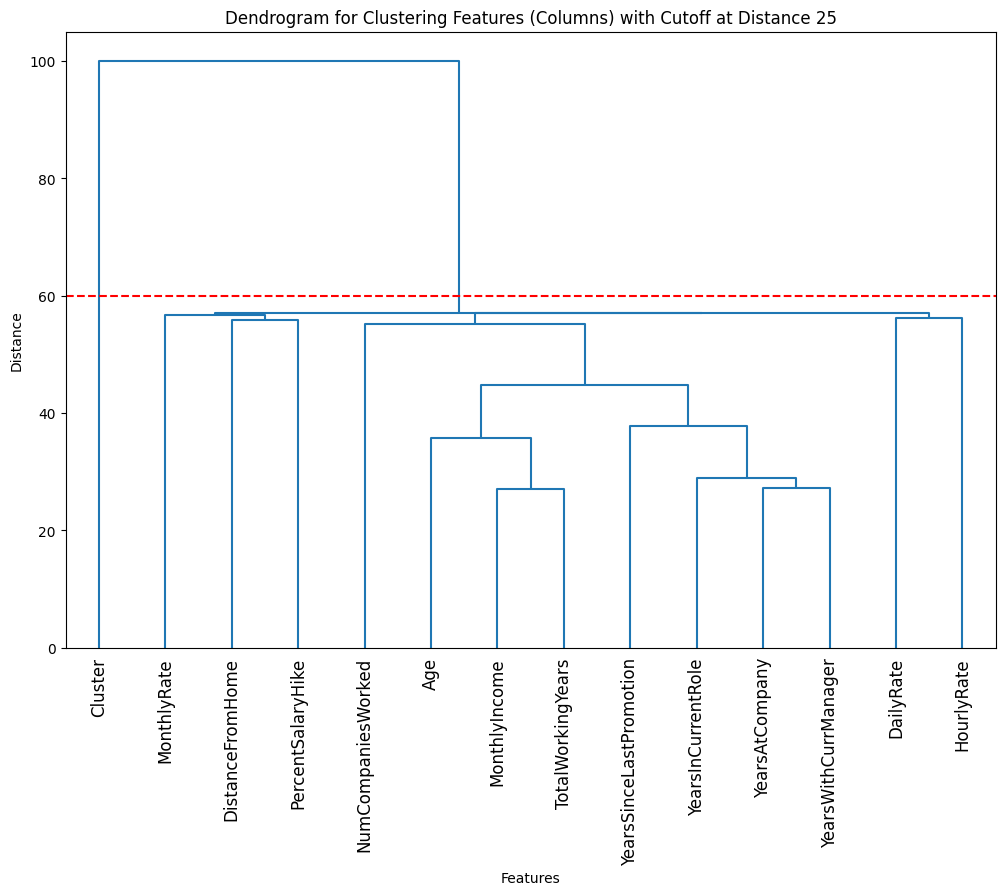

In [57]:
# Transpose the DataFrame so columns are treated as rows for clustering
transformed_df1_cleaned_T = transformed_df1_cleaned.T

# Perform hierarchical/agglomerative clustering using 'single' linkage on the transposed data
linkage_matrix = linkage(transformed_df1_cleaned_T, method='average')

# Plot the dendrogram with a cutoff at distance 25
plt.figure(figsize=(12, 8))
dendrogram(
    linkage_matrix,
    labels=transformed_df1_cleaned_T.index,
    leaf_rotation=90,
    color_threshold=25,  # Set the color threshold to stop clustering at distance 25
)
plt.title('Dendrogram for Clustering Features (Columns) with Cutoff at Distance 25')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.axhline(y=60
            , color='r', linestyle='--')  # Add a horizontal line to indicate the cutoff
plt.show()

PCA Biplots